# Preparations

In [1]:
# Fetch packages.
import sys, os, numpy, libsbml, gillespy2
import matplotlib.pyplot as plt
import json
import statistics
import timeit
import numpy
from gillespy2 import TauHybridSolver, NumPySSASolver, ODESolver, ODECSolver, TauLeapingSolver, SSACSolver

In [2]:
# Plots the model simulation output.
def plot_results(result,species):
    for s in species:
      plt.plot(result['time'],result[s])

# Function for plotting benchmarking output.
def plot_benchmark(benchmarks,lengs):
    medians = list(1000*numpy.array(list(map(statistics.median, benchmarks))))
    plt.plot(lengs,medians,linewidth=4)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim([lengs[0],lengs[-1]])
    plt.ylim([0.001,1.2*numpy.max(medians)])    # Choice of ymin does skew how plot appears.

In [3]:
# Benchmarking functions.
def make_ODE_benchmark(model,n,leng):
    def benchmark_func():
        model.run(solver=ODESolver,t=leng,integrator='lsoda')
    return timeit.Timer(benchmark_func).repeat(repeat=n, number=1)
def make_Gillespie_benchmark(model,n,leng):
    def benchmark_func():
        model.run(solver=SSACSolver,t=leng)
    return timeit.Timer(benchmark_func).repeat(repeat=n, number=1)

# Serialises a benchmarking output using JSON.
def serialize(benchmarks,lengs,filename):
    with open('../Benchmarking_results/Prototyping/%s.json'%(filename) , "w") as write:
        json.dump({"benchmarks": benchmarks, "medians": list(1000*numpy.array(list(map(statistics.median, benchmarks)))), "lengs": lengs.tolist()} , write)

In [4]:
# Benchmarking parameters
n = 10

# Benchamarks

### Multistate

In [5]:
# Load model.
model_multistate = gillespy2.core.import_SBML('../Data/multistate.xml')[0]
model_multistate_no_obs = gillespy2.core.import_SBML('../Data/multistate_no_obs.xml')[0]

CPU times: user 371 ms, sys: 2.55 ms, total: 373 ms
Wall time: 369 ms


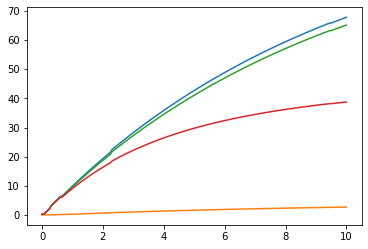

In [6]:
# Check output (plotting currently only possible using TauHybridSolver algorithm).
%time tc_multistate_THS = model_multistate.run(solver=TauHybridSolver,t=10)
plot_results(tc_multistate_THS,['A_P', 'A_unbound_P', 'A_bound_P','RLA_P'])

CPU times: user 1h 21min 38s, sys: 26.8 s, total: 1h 22min 4s
Wall time: 1h 21min 59s


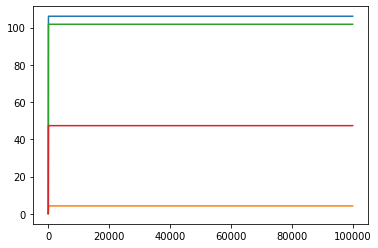

In [7]:
# Check output for maximum length simulation (plotting currently only possible using TauHybridSolver algorithm).
%time long_tc_multistate_THS = model_multistate.run(solver=TauHybridSolver,t=100000)
plot_results(long_tc_multistate_THS,['A_P', 'A_unbound_P', 'A_bound_P','RLA_P'])

In [7]:
# Check ODE simulation time (plotting currently not possible).
%time tc_multistate_ODE = model_multistate_no_obs.run(solver=ODESolver,t=10,integrator='lsoda')

CPU times: user 53.6 ms, sys: 0 ns, total: 53.6 ms
Wall time: 51.7 ms


In [8]:
# Benchmark ODE simulation.
lengs_multistate_ODE = numpy.logspace(1, 5, num=5)
multistate_ODE_benchmarks = [-1.0] * len(lengs_multistate_ODE)
for i in range(0,len(lengs_multistate_ODE)):
    multistate_ODE_benchmarks[i] = make_ODE_benchmark(model_multistate_no_obs,n,lengs_multistate_ODE[i])
serialize(multistate_ODE_benchmarks,lengs_multistate_ODE,f'gillespy2_lsoda_multistate')

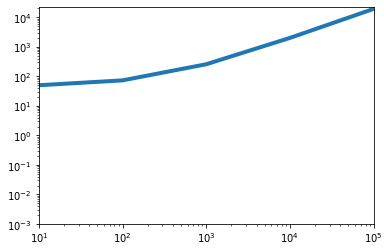

In [9]:
# Plot ODE Benchmarks
plot_benchmark(multistate_ODE_benchmarks,lengs_multistate_ODE)

In [10]:
# Check Gillespie simulation (plotting currently not possible).
%time tc_multistate_Gillespie = model_multistate_no_obs.run(solver=SSACSolver,t=10)

CPU times: user 31.8 ms, sys: 12.4 ms, total: 44.2 ms
Wall time: 2.46 s


In [11]:
# Benchmark Gillespie simulation.
lengs_multistate_Gillespie = numpy.logspace(1, 5, num=5)
multistate_Gillespie_benchmarks = [-1.0] * len(lengs_multistate_Gillespie)
for i in range(0,len(lengs_multistate_Gillespie)):
    multistate_Gillespie_benchmarks[i] = make_Gillespie_benchmark(model_multistate_no_obs,n,lengs_multistate_Gillespie[i])
serialize(multistate_Gillespie_benchmarks,lengs_multistate_Gillespie,f'gillespy2_ssa_multistate')

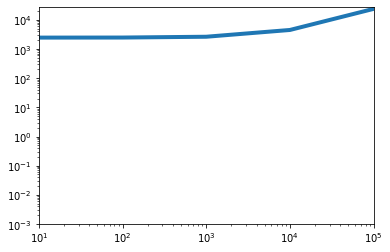

In [12]:
# Plot Gillespie Benchmarks
plot_benchmark(multistate_Gillespie_benchmarks,lengs_multistate_Gillespie)

### Multisite2

In [8]:
# Load model.
model_multisite2 = gillespy2.core.import_SBML('../Data/multisite2.xml')[0]
model_multisite2_no_obs = gillespy2.core.import_SBML('../Data/multisite2_no_obs.xml')[0]

CPU times: user 8.22 s, sys: 24 ms, total: 8.24 s
Wall time: 8.24 s


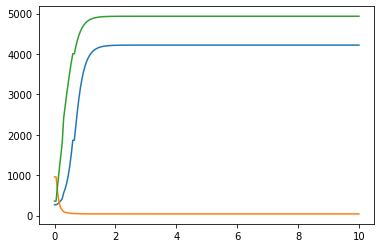

In [9]:
# Check output (plotting currently only possible using TauHybridSolver algorithm).
%time tc_multisite2_THS = model_multisite2.run(solver=TauHybridSolver,t=10)
plot_results(tc_multisite2_THS,['Rfree', 'Lfree', 'A1P'])

CPU times: user 2h 20min 50s, sys: 20.5 s, total: 2h 21min 11s
Wall time: 2h 21min 12s


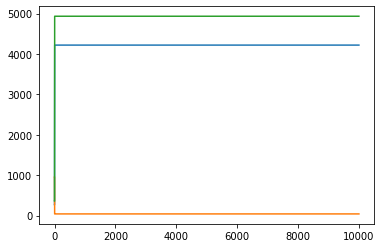

In [10]:
# Check output for maximum length simulation (plotting currently only possible using TauHybridSolver algorithm).
%time long_tc_multisite2_THS = model_multisite2.run(solver=TauHybridSolver,t=10000)
plot_results(long_tc_multisite2_THS,['Rfree', 'Lfree', 'A1P'])

In [15]:
# Check ODE simulation (plotting currently not possible).
%time tc_multisite2_ODE = model_multisite2_no_obs.run(solver=ODESolver,t=10,integrator='lsoda')

CPU times: user 864 ms, sys: 0 ns, total: 864 ms
Wall time: 861 ms


In [ ]:
# Benchmark ODE simulation.
lengs_multisite2_ODE = numpy.logspace(1, 4, num=4)
multisite2_ODE_benchmarks = [-1.0] * len(lengs_multisite2_ODE)
for i in range(0,len(lengs_multisite2_ODE)):
    multisite2_ODE_benchmarks[i] = make_ODE_benchmark(model_multisite2_no_obs,n,lengs_multisite2_ODE[i])
serialize(multisite2_ODE_benchmarks,lengs_multisite2_ODE,f'gillespy2_lsoda_multisite2')

In [ ]:
# Plot ODE Benchmarks
plot_benchmark(multisite2_ODE_benchmarks,lengs_multisite2_ODE)

In [16]:
# Check Gillespie simulation (plotting currently not possible).
%time tc_multisite2_Gillespie = model_multisite2_no_obs.run(solver=SSACSolver,t=10.0)

CPU times: user 191 ms, sys: 0 ns, total: 191 ms
Wall time: 4.06 s


In [ ]:
# Benchmark Gillespie simulation.
lengs_multisite2_Gillespie = numpy.logspace(1, 4, num=4)
multisite2_Gillespie_benchmarks = [-1.0] * len(lengs_multisite2_Gillespie)
for i in range(0,len(lengs_multisite2_Gillespie)):
    multisite2_Gillespie_benchmarks[i] = make_Gillespie_benchmark(model_multisite2_no_obs,n,lengs_multisite2_Gillespie[i])
serialize(multisite2_Gillespie_benchmarks,lengs_multisite2_Gillespie,f'gillespy2_ssa_multisite2')

In [ ]:
# Plot Gillespie Benchmarks
plot_benchmark(multisite2_Gillespie_benchmarks,lengs_multisite2_Gillespie)

### Egfr_net

In [5]:
# Load model.
model_egfr_net = gillespy2.core.import_SBML('../Data/egfr_net.xml')[0]
model_egfr_net_no_obs = gillespy2.core.import_SBML('../Data/egfr_net_no_obs.xml')[0]

CPU times: user 3min 18s, sys: 157 ms, total: 3min 18s
Wall time: 3min 18s


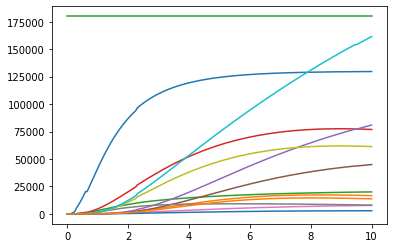

In [6]:
# Check output (plotting currently only possible using TauHybridSolver algorithm).
%time tc_egfr_net_THS = model_egfr_net.run(solver=TauHybridSolver,t=10)
plot_results(tc_egfr_net_THS,['Dimers', 'Sos_act', 'Y1068', 'Y1148', 'Shc_Grb', 'Shc_Grb_Sos', 'R_Grb2', 'R_Shc', 'R_ShcP', 'ShcP', 'R_G_S', 'R_S_G_S', 'Efgr_tot'])

CPU times: user 19min 46s, sys: 2.08 s, total: 19min 49s
Wall time: 19min 48s


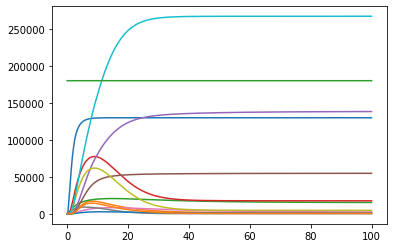

In [7]:
# Check output for maximum length simulation (plotting currently only possible using TauHybridSolver algorithm).
%time long_tc_egfr_net_THS = model_egfr_net.run(solver=TauHybridSolver,t=100)
plot_results(long_tc_egfr_net_THS,['Dimers', 'Sos_act', 'Y1068', 'Y1148', 'Shc_Grb', 'Shc_Grb_Sos', 'R_Grb2', 'R_Shc', 'R_ShcP', 'ShcP', 'R_G_S', 'R_S_G_S', 'Efgr_tot'])

In [19]:
# Check ODE simulation (plotting currently not possible).
%time tc_egfr_net_ODE = model_egfr_net_no_obs.run(solver=ODESolver,t=10,integrator='lsoda')

CPU times: user 26.8 s, sys: 0 ns, total: 26.8 s
Wall time: 16.7 s


In [ ]:
# Benchmark ODE simulation.
lengs_egfr_net_ODE = numpy.logspace(1, 2, num=2)
egfr_net_ODE_benchmarks = [-1.0] * len(lengs_egfr_net_ODE)
for i in range(0,len(lengs_egfr_net_ODE)):
    %time egfr_net_ODE_benchmarks[i] = make_ODE_benchmark(model_egfr_net_no_obs,n,lengs_egfr_net_ODE[i])
serialize(egfr_net_ODE_benchmarks,lengs_egfr_net_ODE,f'gillespy2_lsoda

In [ ]:
# Plot ODE Benchmarks
plot_benchmark(egfr_net_ODE_benchmarks,lengs_egfr_net_ODE)

In [20]:
# Check Gillespie simulation (plotting currently not possible).
%time tc_egfr_net_Gillespie = model_egfr_net_no_obs.run(solver=SSACSolver,t=10.0)

CPU times: user 2.21 s, sys: 0 ns, total: 2.21 s
Wall time: 4min 15s


In [ ]:
# Benchmark Gillespie simulation.
lengs_egfr_net_Gillespie = numpy.logspace(1, 2, num=2)
egfr_net_Gillespie_benchmarks = [-1.0] * len(lengs_egfr_net_Gillespie)
for i in range(0,len(lengs_egfr_net_Gillespie)):
    egfr_net_Gillespie_benchmarks[i] = make_Gillespie_benchmark(model_egfr_net_no_obs,n,lengs_egfr_net_Gillespie[i])
serialize(egfr_net_Gillespie_benchmarks,lengs_egfr_net_Gillespie,f'gillespy2_ssa_egfr_net')

In [ ]:
# Plot Gillespie Benchmarks
plot_benchmark(egfr_net_Gillespie_benchmarks,lengs_egfr_net_Gillespie)

### BCR

In [8]:
# Load model.
model_BCR = gillespy2.core.import_SBML('../Data/BCR.xml')[0]
model_BCR_no_obs = gillespy2.core.import_SBML('../Data/BCR_no_obs.xml')[0]

In [ ]:
# Check output (plotting currently only possible using TauHybridSolver algorithm).
%time tc_BCR_THS = model_BCR.run(solver=TauHybridSolver,t=10)
plot_results(tc_BCR_THS,['Activated_Syk', 'Ig_alpha_P', 'Ig_alpha_PP', 'Ig_beta_PP', 'Activated_Lyn', 'Autoinhibited_Lyn', 'Activated_Fyn', 'Autoinhibited_Fyn', 'PAG1_Csk'])

In [ ]:
# Check output for maximum length simulation (plotting currently only possible using TauHybridSolver algorithm).
%time long_tc_BCR_THS = model_BCR.run(solver=TauHybridSolver,t=100)
plot_results(long_tc_BCR_THS,['Activated_Syk', 'Ig_alpha_P', 'Ig_alpha_PP', 'Ig_beta_PP', 'Activated_Lyn', 'Autoinhibited_Lyn', 'Activated_Fyn', 'Autoinhibited_Fyn', 'PAG1_Csk'])

In [ ]:
# Check ODE simulation (plotting currently not possible).
%time tc_BCR_ODE = model_BCR_no_obs.run(solver=ODESolver,t=10.0,integrator='lsoda')

In [ ]:
# Benchmark ODE simulation.
lengs_BCR_ODE = numpy.logspace(1, 2, num=2)
BCR_ODE_benchmarks = [-1.0] * len(lengs_BCR_ODE)
for i in range(0,len(lengs_BCR_ODE)):
    BCR_ODE_benchmarks[i] = make_ODE_benchmark(model_BCR_no_obs,n,lengs_BCR_ODE[i])
serialize(BCR_ODE_benchmarks,lengs_BCR_ODE,f'gillespy2_lsoda_BCR')

In [ ]:
# Plot ODE Benchmarks
plot_benchmark(BCR_ODE_benchmarks,lengs_BCR_ODE)

In [ ]:
### Gillespie simulations not performed using Copasi for the BCR model (too long simulation times required). ###
# Check Gillespie simulation (plotting currently not possible).
# %time tc_BCR_Gillespie = model_BCR_no_obs.run(solver=SSACSolver,t=10.0)

In [ ]:
# Benchmark Gillespie simulation.
# lengs_BCR_Gillespie = numpy.logspace(1, 2, num=2)
# BCR_Gillespie_benchmarks = [-1.0] * len(lengs_BCR_Gillespie)
# for i in range(0,len(lengs_BCR_Gillespie)):
#     BCR_Gillespie_benchmarks[i] = make_Gillespie_benchmark(model_BCR_no_obs,n,lengs_BCR_Gillespie[i])
# serialize(BCR_Gillespie_benchmarks,lengs_BCR_Gillespie,f'gillespy2_ssa_BCR')

In [ ]:
# Plot Gillespie Benchmarks
# plot_benchmark(BCR_Gillespie_benchmarks,lengs_BCR_Gillespie)

### Fceri_gamma2

In [ ]:
### Simulations not performed using Copasi for the fceri_gamma2 model (too long simulation times required). ###
# Load model.
# model_fceri_gamma2 = gillespy2.core.import_SBML('../Data/fceri_gamma2.xml')[0]
# model_fceri_gamma2_no_obs = gillespy2.core.import_SBML('../Data/fceri_gamma2_no_obs.xml')[0]

In [ ]:
# Check output (plotting currently only possible using TauHybridSolver algorithm).
# %time tc_fceri_gamma2_THS = model_fceri_gamma2_no_obs.run(solver=TauHybridSolver,t=10)
# plot_results(tc_fceri_gamma2_THS,['Lyn_Free', 'RecMon', 'RecPbeta', 'RecPgamma', 'RecSyk', 'RecSykP5'])

In [ ]:
# Check ODE simulation (plotting currently not possible).
# %time tc_fceri_gamma2_ODE = model_fceri_gamma2_no_obs.run(solver=ODESolver,t=10,integrator='lsoda')

In [ ]:
# Benchmark ODE simulation.
# lengs_fceri_gamma2_Gillespie = numpy.logspace(1, 2, num=2)
# fceri_gamma2_ODE_benchmarks = [-1.0] * len(lengs)
# for i in range(0,len(lengs)):
#     fceri_gamma2_ODE_benchmarks[i] = make_ODE_benchmark(model_fceri_gamma2_no_obs,n,lengs[i])
# serialize(fceri_gamma2_ODE_benchmarks,lengs_fceri_gamma2_Gillespie,f'gillespy2_lsoda_fceri_gamma2')

In [ ]:
# Plot ODE Benchmarks
# plot_benchmark(fceri_gamma2_ODE_benchmarks,lengs)

In [ ]:
# Check Gillespie simulation (plotting currently not possible).
# %time tc_fceri_gamma2_Gillespie = model_fceri_gamma2_no_obs.run(solver=SSACSolver,t=10)

In [ ]:
# Benchmark Gillespie simulation.
# lengs_fceri_gamma2_Gillespie = numpy.logspace(1, 2, num=2)
# fceri_gamma2_Gillespie_benchmarks = [-1.0] * len(lengs_fceri_gamma2_Gillespie)
# for i in range(0,len(lengs_fceri_gamma2_Gillespie)):
#     fceri_gamma2_Gillespie_benchmarks[i] = make_Gillespie_benchmark(model_fceri_gamma2_no_obs,n,lengs_fceri_gamma2_Gillespie[i])
# serialize(fceri_gamma2_Gillespie_benchmarks,lengs_fceri_gamma2_Gillespie,f'gillespy2_ssa_fceri_gamma2')

In [ ]:
# Plot Gillespie Benchmarks
# plot_benchmark(fceri_gamma2_Gillespie_benchmarks,lengs_fceri_gamma2_Gillespie)